# Introduction to Pandas 

## What is Pandas

- Pandas is a powerful data manipulation and analysis library for Python.
- It provides easy-to-use data structures and functions for working with structured data.
- The name "Pandas" is derived from "Panel Data."
- It's free and open-source tool.

## Why use Pandas?

- Data manipulation and analysis are essential in data science and data analysis.
- Pandas simplifies data tasks, making them more efficient and intuitive.
- It's a crucial tool for cleaning, transforming, and analyzing data.
- Especially useful for handling tabular and time-series data.

## Installation:

pandas can be installed via pip from PyPI:

```
pip install pandas
```

Note, that you must have pip>=19.3 to install from PyPI.

## Key Pandas Data Structures

- Series: One-dimensional labeled arrays.
- DataFrame: Two-dimensional, table-like data structure.
- Series and DataFrames are built on top of NumPy arrays.

## Series

- Series is like a one-dimensional array with labeled data.
- It can hold any data type.
- The labels are called an "index."
- Example: A Series of student names and their corresponding scores.

In [64]:
import pandas as pd
import numpy as np

# Create a dictionary with student names and their scores
data = {
        'Student Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Score': [92, 78, 85, 90, 88]
}

# Create a Pandas Series from the dictionary
student_scores = pd.Series(data['Score'], index=data['Student Name'], dtype=np.int8)

# Display the Series
print(student_scores)

Alice      92
Bob        78
Charlie    85
David      90
Eve        88
dtype: int8



## DataFrame
- DataFrame is a two-dimensional, size-mutable, and labeled data structure.
- It's like a spreadsheet or SQL table.
- Rows and columns are both labeled.
- Example: A DataFrame of sales data with rows as transactions and columns as attributes.

In [65]:
# Create a dictionary with student names and their scores
data = {
        'Student Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Score': [92, 78, 85, 90, 88]
}

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

  Student Name  Score
0        Alice     92
1          Bob     78
2      Charlie     85
3        David     90
4          Eve     88


## Loading Data into DataFrames

Pandas supports reading data from various file formats, including CSV, Excel, and more, by functions like `pd.read_csv()` , `pd.read_excel()` and so on.

Let's load the data in [drinks.csv](./datasets/drinks.csv) into a DataFrame:

In [66]:
# load the data
df = pd.read_csv('./datasets/drinks.csv')

# print it
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


## Matplotlib and Pandas

### Plot DataFrame with mathplotlib - overview

One of the most common ways to plot data from a DataFrame is using the `plot` method. This method provides a convenient interface for quickly creating common plots of your DataFrame's data.

Here's an example of how to use the plot method to create a line plot of a DataFrame:

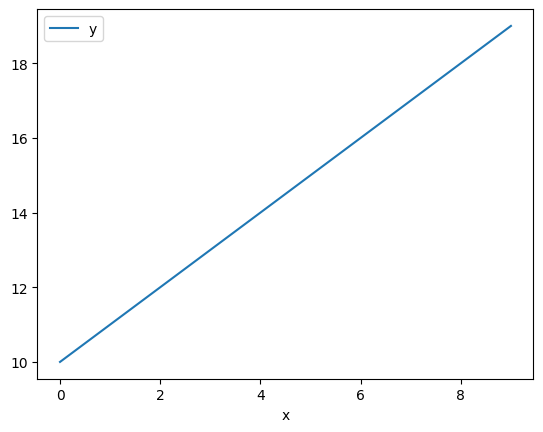

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# create a simple DataFrame
df = pd.DataFrame({'x': range(10), 'y': range(10, 20)})

# plot the data using the 'x' and 'y' columns
df.plot(x='x', y='y')

# show the plot
plt.show()

You can also use the plot method to create other types of plots, such as bar plots, scatter plots, and histograms. For example, here's how you would create a bar plot:

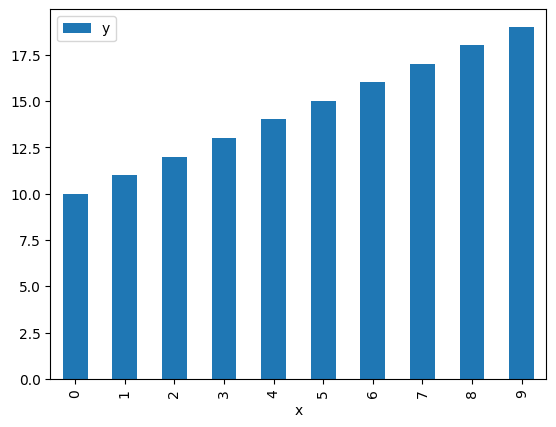

In [68]:
# Variant 1, using 'kind' argument
# df.plot(kind='bar', x='x', y='y')

# Variant 2, using method:
df.plot.bar(x='x', y='y')
plt.show()

#### plot multiple columns of a DataFrame

By default, df.plot() will plot all columns in a single axes, if we do not specify the y parameter.
If we pass to the y parameter a list of column names, it will plot only those columns.

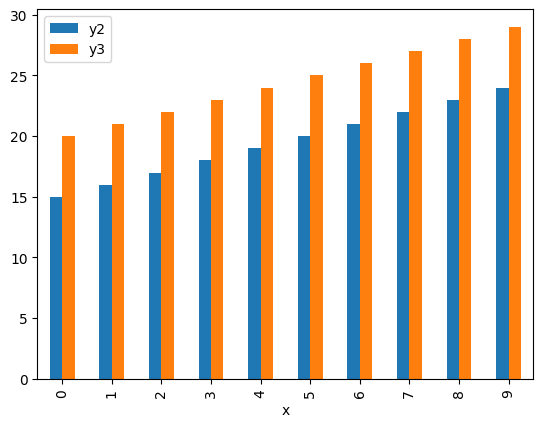

In [69]:
# create a simple DataFrame
df = pd.DataFrame({'x': range(10), 'y1': range(10, 20), 'y2': range(15, 25), 'y3': range(20, 30)})

## plot all columns
# df.plot.bar(x='x')

## plot only 'y2' and 'y3' columns:
df.plot.bar(x='x',y=['y2', 'y3'])
plt.show()

#### Make separate subplots for each column.

Setting parameter 'subplots=True' matplotlib will make separate subplots for each column.

We can specify which axes the sublots to share, by setting 'sharex' or 'sharey' parameter to True. 

With 'layout=(rows, columns)' we can set the layout of subplots

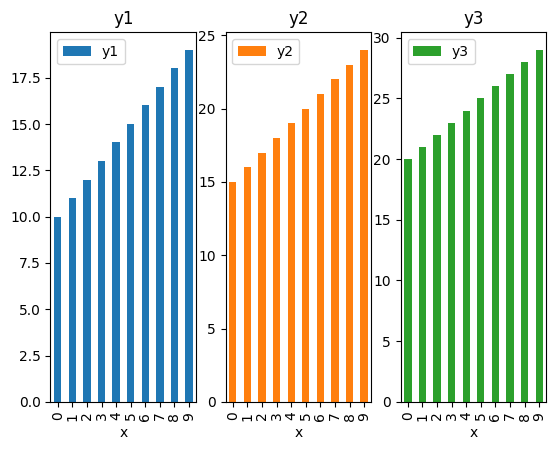

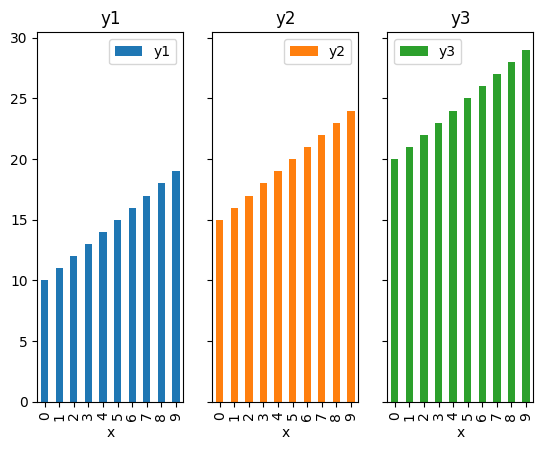

In [70]:
# create a simple DataFrame
df = pd.DataFrame({'x': range(10), 'y1': range(10, 20), 'y2': range(15, 25), 'y3': range(20, 30)})

## plot all columns, share X is by default
df.plot.bar(x='x',subplots=True, layout=(1,3))

## plot all columns, share Y
df.plot.bar(x='x',subplots=True, sharey=True, layout=(1,3))

plt.show()

### Examples

### Dataset: [teaching_methods.csv](./datasets/teaching_methods.csv)

In [71]:
df = pd.read_csv('./datasets/teaching_methods.csv')
df.head(5)

,Score,Teaching Method
0,27.091079,Method 1
1,25.046260,Method 1
2,27.490826,Method 1
3,24.597874,Method 1
4,23.932245,Method 1


In [72]:
df.describe()

,Score
count,100.000000
mean,27.087734
std,5.776030
min,9.766905
25%,23.292502
50%,26.844145
75%,31.140816
max,39.715477


array([[<Axes: title={'center': 'Method 1'}>,
        <Axes: title={'center': 'Method 2'}>],
       [<Axes: title={'center': 'Method 3'}>,
        <Axes: title={'center': 'Method 4'}>]], dtype=object)

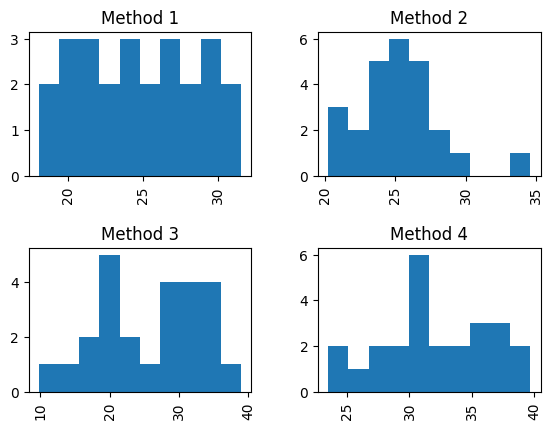

In [73]:
df.hist(column='Score',by='Teaching Method')

<Axes: title={'center': 'Score'}, xlabel='Teaching Method'>

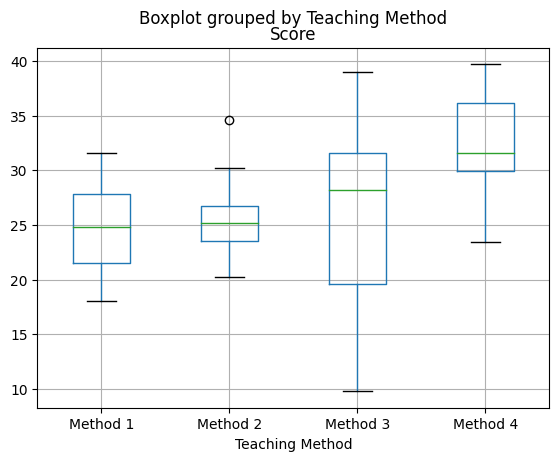

In [74]:
df.boxplot(column='Score',by='Teaching Method')

### Dataset [drinks.csv](./datasets/drinks.csv)

In [75]:
drinks = pd.read_csv('./datasets/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [76]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


#### Plot number of countries in each continent:

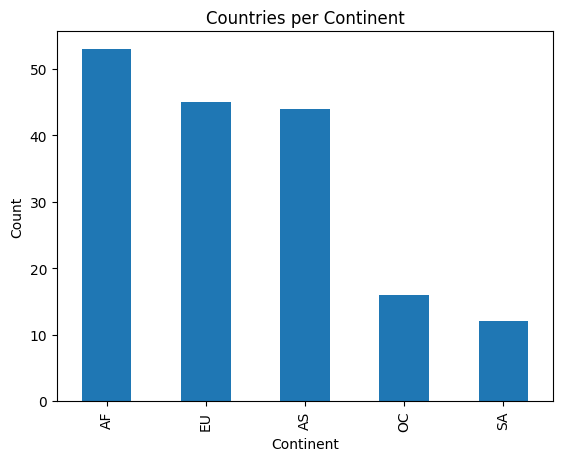

In [77]:
drinks.continent.value_counts().plot.bar(title='Countries per Continent')

plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

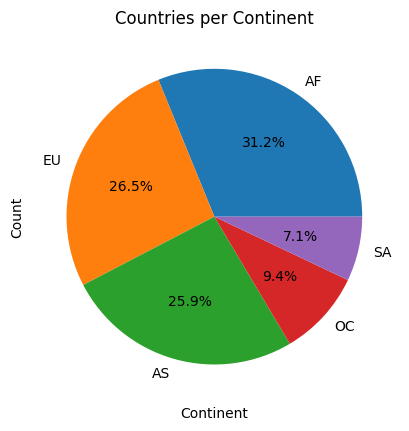

In [78]:
drinks.continent.value_counts().plot.pie(title='Countries per Continent',autopct='%1.1f%%')

plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

#### Plot distribution of wine and beer servings

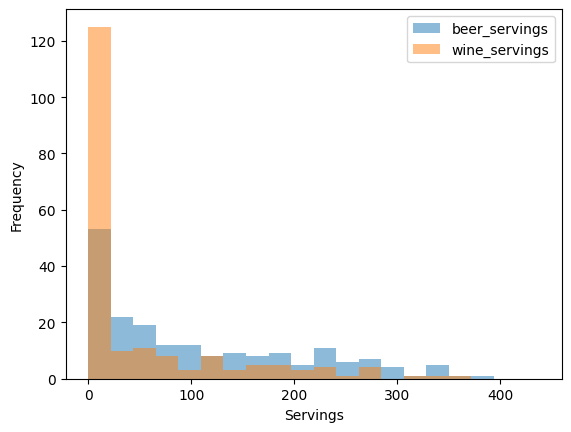

In [79]:
drinks.plot.hist(column= ['beer_servings','wine_servings'],bins=20,alpha = 0.5)
plt.xlabel('Servings')

plt.show()

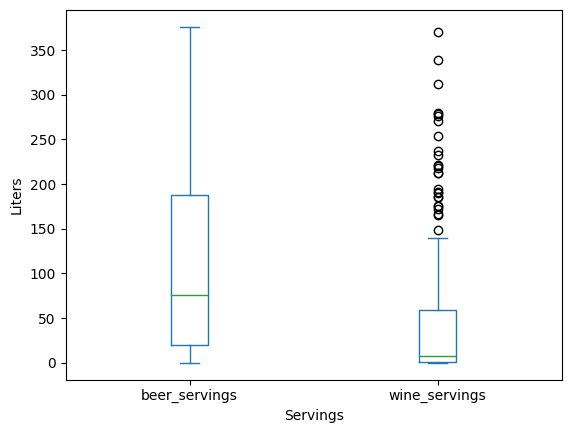

In [80]:
drinks.plot.box(column= ['beer_servings','wine_servings'])
plt.xlabel('Servings')
plt.ylabel('Liters')
plt.show()

#### Plot wine-servings per each continent

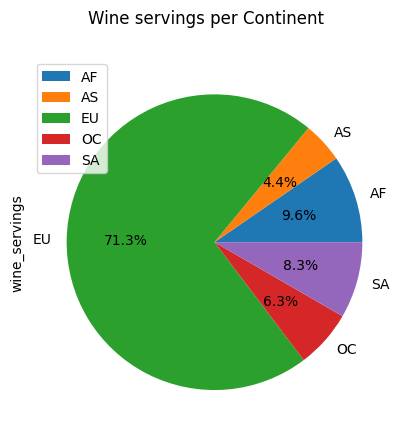

In [81]:
continents_group = drinks.groupby('continent').sum()
# continents_group.plot.pie(y='wine_servings', legend=True)
continents_group.plot.pie(y='wine_servings',title='Wine servings per Continent',autopct='%1.1f%%', subplots=True)

plt.show()

#### Beer servings vs Wine servings in EU and AF

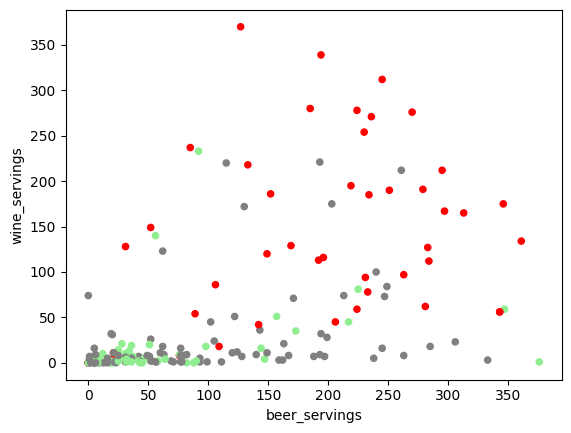

In [82]:
# lets make a colors array, which will hold different color values for countries we are interested.
# for the rest - the default color will be 'gray'
colors = np.full_like(drinks.country, 'gray')

# assign red color for the EU countries:
colors[drinks.continent=="EU"] = "red"

# assign lightgreen color for the AF countries:
colors[drinks.continent=="AF"] = "lightgreen"

drinks.plot.scatter(x='beer_servings', y='wine_servings',color=colors)

plt.show()